<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **03. Pandas Introduction!** </center>



## **Outline**
1. **Pandas Introduction**
2. **Pandas DataFrames and DataSeries**
3. **More about maniputalte pandas**




In [1]:
#@title Execute this cell
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20252-C1" #@param {type:"string"}
assignment_id = group_id +'.pandas_intro'
student_id = "2211233" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [2]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [3]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "/ai-uis-student-master" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student-master


In [4]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'2.2.2'

#**1. Pandas Introduction**

[*Pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API that provides high-performance, easy-to-use data structures and data analysis.

Among main pandas features, are:
* Access and manipulate data within a `DataFrame` and `Series`  data structures
* Allows import CSV data into a *pandas* `DataFrame`
* Allows reindex a `DataFrame` to shuffle data

***see more tutorials at [pandas pydata](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)***

- [Dataframes](https://www.datacamp.com/tutorial/pandas-tutorial-dataframe-python)

[Pandas and data structures](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/)


The main data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.
  

<center>
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/pandas-data-structure.png" width="600">
</center>

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to `Series` objects, for instance:


  
  
  


# **2. DataFrame and series**

The data frame is used for data manipulation like in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html). Typically the DataFrame load data from external entire files. The files can have millions of data that can be manipulated with pandas using Dataframes. For instance:

In [ ]:
#@title **code** Loading and inspecting
# a =  pd.read_csv("data/california_housing_train.csv")
a =  pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
d = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
type(d), type(a)
d
#display DataFrame
display(d)
#Accesing its columns
d["median_income"] #single column, es recomendable hacerlo usando los corchetes como un diccionario
#accesing multiple columns
d[["longitude", "latitude", "median_house_value"]]
d.loc[:, "longitude":"median_income"] #column slice by label
d.filter(like="median") #columns containing "median"


#accesing its rows

d.iloc[0] #By integer position
d.iloc[0:5]
d.iloc[12345]

#rows+column together

d.iloc[0. [0,1,2,8]] #integer position based




#boolean filtering
high_income = d['median_income'] > 5



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


,longitude,latitude,median_house_value
0,-114.31,34.19,66900.0
1,-114.47,34.40,80100.0
2,-114.56,33.69,85700.0
3,-114.57,33.64,73400.0
4,-114.57,33.57,65500.0
...,...,...,...
16995,-124.26,40.58,111400.0
16996,-124.27,40.69,79000.0
16997,-124.30,41.84,103600.0
16998,-124.30,41.80,85800.0


DataFrame.head  displays the first few records of a DataFrame:

In [ ]:
#@title **code** Dsiplay data, see columns and shape
print("columns and shape", d.columns, d.shape)
print("---------------- \n Display data \n---------------")
d.head(17)
d.tail(5)
d.sample(5, random_state=1234) #se le pone el random para que cada vez que ejecutemos aparezca un nuevo aleatorio

columns and shape Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object') (17000, 9)
---------------- 
 Display data 
---------------


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2394,-117.55,33.93,25.0,5187.0,934.0,2725.0,860.0,4.1865,154300.0
286,-116.75,32.82,17.0,3348.0,481.0,1222.0,443.0,6.6361,308600.0
12662,-121.75,37.11,18.0,3167.0,478.0,1414.0,482.0,6.8773,467700.0
4736,-118.08,33.91,18.0,1573.0,396.0,1200.0,365.0,2.8950,146900.0
11740,-121.31,38.01,22.0,2575.0,680.0,1367.0,645.0,1.4274,90500.0


In [ ]:
#@title **code** `DataFrame.describe` to show interesting statistics about a DataFrame
d.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#@title **create a pandas code**
city_names = pd.Series(['Bucaramanga', 'Bogotá', 'Málaga'])
population_col = pd.Series([3201, 10157850,000])

miprimerdata = pd.DataFrame({ 'Ciudades': city_names, 'Population': population_col })

A powerful feature of *pandas* is graphing. For example, `DataFrame.hist`  shows the distribution of values in a column

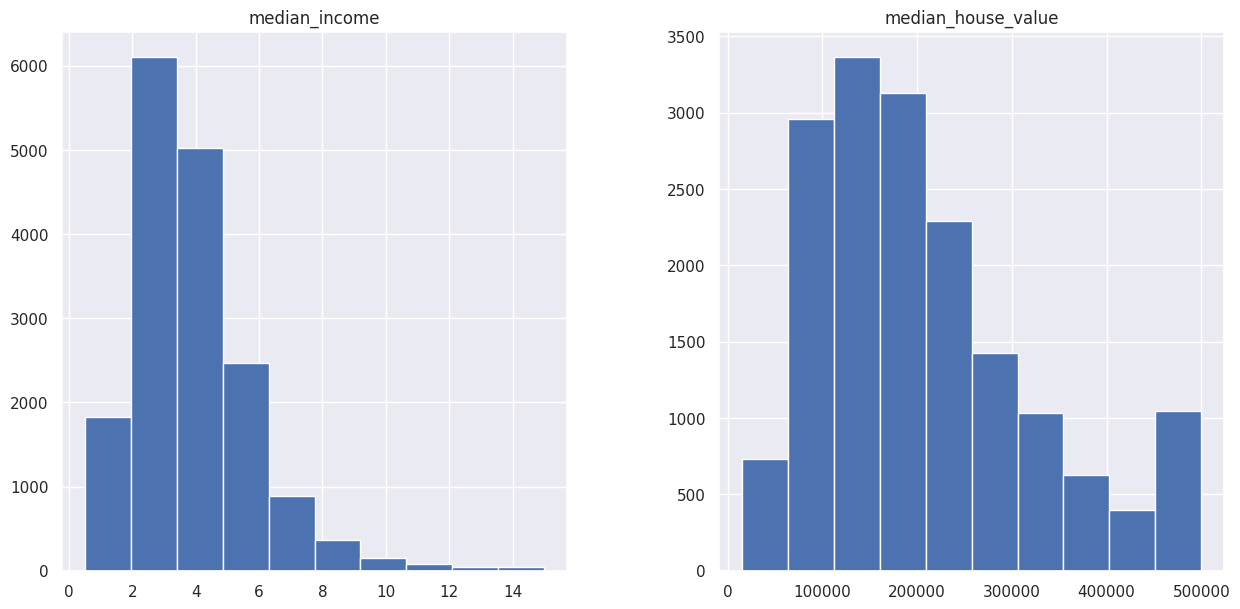

In [ ]:
#@title **code**
plt.figure(figsize = (15, 7))
ax= plt.subplot(1,2,1)
d.hist('median_income', ax=ax);
ax=plt.subplot(1,2,2)
d.hist('median_house_value', ax=ax);

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Explain next plots.
- Which information can be obtained from these plots?
- How related is the bar-plot with histograms?
- Plot an histogram of `population` and `scatterplot` of other variable.

In [ ]:
 #@title **code student**





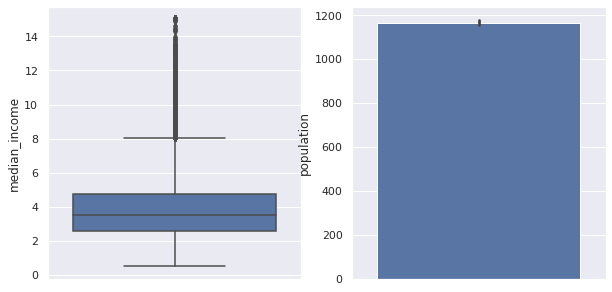

In [ ]:
#@title **code** Which information we can obtain?
plt.figure(figsize = (10, 5))
ax=plt.subplot(1,2,1)
sns.boxplot(data=d, y='median_income', ax= ax);
ax=plt.subplot(1,2,2)
sns.barplot( y='population', data=d, estimator=np.median, ax= ax);


We can also operate for specific `series` into the `DataFrame`. See next examples

In [ ]:
#@title **code** working with series
print(d["median_house_value"].head())

#@markdown acces to a particular data
print(d["median_house_value"][500])

print(type(d), type(d["median_house_value"]))

#@markdown acces to a specific range of data
d[1100:1115]

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64
154600.0
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1100,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0
1101,-117.11,32.69,34.0,1144.0,295.0,1271.0,302.0,2.0900,91800.0
1102,-117.11,32.68,36.0,26.0,14.0,58.0,23.0,1.9107,125000.0
1103,-117.11,32.67,52.0,280.0,71.0,217.0,71.0,1.4844,83300.0
1104,-117.11,32.67,52.0,204.0,74.0,248.0,57.0,1.7961,47500.0
1105,-117.11,32.67,46.0,928.0,236.0,790.0,235.0,1.6806,92500.0
1106,-117.11,32.67,43.0,515.0,146.0,445.0,140.0,1.6094,93000.0
1107,-117.11,32.64,23.0,1619.0,447.0,1025.0,415.0,1.8580,67500.0
1108,-117.11,32.62,27.0,1846.0,509.0,1078.0,482.0,2.1719,131500.0
1109,-117.11,32.59,18.0,2329.0,580.0,1538.0,567.0,2.1179,153100.0


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What about next lines?
- How can be helpful?

In [ ]:
#@title **code**
#to obtain only values to a easy processing
print(d["population"].unique()   )
print(d["housing_median_age"].unique()   )
print(d["median_house_value"].dtype, d["population"].dtype, d["latitude"].dtype)

[1015. 1129.  333. ... 1899.  516. 3546.]
[15. 19. 17. 14. 20. 29. 25. 41. 34. 46. 16. 21. 48. 31. 28. 24. 18. 30.
 32. 23. 38. 35. 33. 13. 11. 10.  6. 12. 27. 22.  5.  8. 37.  3. 44.  2.
 26.  9.  7. 36.  4. 52. 40. 43. 42. 39. 49. 47. 50. 45. 51.  1.]
float64 float64 float64


**More and more information about the dataset can be easily obtained with `Pandas`**

In [ ]:
#@title **code** `info()`
# get the description of data
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## **fixing and segmenting data**

In [ ]:
#@title **code** we can obtain a sub-data frame by selecting columns.
print(d.columns)
#@markdown working with specific columns
d[["population", "median_house_value"]].head()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


,population,median_house_value
0,1015.0,66900.0
1,1129.0,80100.0
2,333.0,85700.0
3,515.0,73400.0
4,624.0,65500.0


In [ ]:
#@title **code:** to add a new column in the dataset
print(population_col) # remember..a manual series
d["new_virtual"] = population_col
d.head(15)

0        3201
1    10157850
2           0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3201.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,10157850.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,NaN
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,NaN
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,NaN
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,NaN
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,NaN
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,NaN
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,NaN


In [ ]:
#@title **code** detecting null values
#very important to clean values.
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
median_house_value 0
new_virtual 16997


In [ ]:
#@title **code:** Fill NA/NaN values using the specified method
d.new_virtual.fillna(population_col.mean(), inplace=True)
d.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3201.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,10157850.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3387017.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,3387017.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,3387017.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,3387017.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,3387017.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,3387017.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,3387017.0


## Filtering data by boolean index

In [ ]:
#@title **code** boolean index to filter
d[d.population>15000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
2274,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,3387017.0
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,3387017.0
2969,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,3387017.0
3296,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,3387017.0
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,3387017.0


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now, create a dataset with only rows that have `median_house_value` larger tan `30000`,  `housing_median_age` less than 50, and `population` larger than 10000

- Return the new dataframe

---

- Display shape of new Dataframe
- Count the registers for each serien in new dataframe
- Display dataframe

** Other option is the interval between [30000 - 40000]



In [20]:
 #@title **code student**
def filter_housing_dataframe(d):
  import pandas as pd
  mask1 = (d["median_house_value"] >30000) & (d["housing_median_age"] <50) & (d["population"] >10000)
  #d[(d.median_house_value>30000) & (d.housing_median_age <50) & (d.population > 10000)]

  return d[mask1]




In [18]:
#@title ## **send your answer**
student_func_str = inspect.getsource(filter_housing_dataframe)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- Using the function [`apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) create a new column named `population_filter` that stores `True` or `False` whether the value of the column `population` is greater than 1429 (mean value).
- Return the dataframe with the added column.


In [ ]:
 #@title **code student**
def apply_dataframe():

  """
  Put your code here
  """

  pass

In [ ]:
#@title ## **send your answer**
student_func_str = inspect.getsource(apply_dataframe)
r = check_solution_and_evaluate(assignment_id, student_func_str)

## **Indexes**
 Series and DataFrame objects also define an index property that assigns an identifier value to each Series item or DataFrame row. Once created they do not change when data is reordered.

In [ ]:
#@title **code** index examples

print(d.index)
print(type(d.index))

print(population_col.index)
print(type(population_col))

RangeIndex(start=0, stop=17000, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=3, step=1)
<class 'pandas.core.series.Series'>


We can **re-order** the rows using both: manual changes and random vectors to fully change. See next example:

In [ ]:
np.random.permutation(3)

array([2, 1, 0])

In [ ]:
#@title **code** **Reindex**

d.shape
#@markdown  manually
print((d.reindex([2, 0, 1])))


#@markdown  Reindexing is a great way to shuffle (randomize) a DataFrame
print(np.random.permutation(d.index).shape)
print(d.head(10))
import numpy as np
d_red = d.reindex(np.random.permutation(d.index)).head()
d_red.head(10)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -114.56     33.69                17.0        720.0           174.0   
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   

   population  households  median_income  median_house_value  new_virtual  
2       333.0       117.0         1.6509             85700.0          0.0  
0      1015.0       472.0         1.4936             66900.0       3201.0  
1      1129.0       463.0         1.8200             80100.0   10157850.0  
(17000,)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
3873,-117.95,33.84,18.0,3418.0,815.0,1961.0,773.0,3.6500,171400.0,3387017.0
1029,-117.10,32.69,35.0,1292.0,272.0,1183.0,272.0,2.0547,98000.0,3387017.0
6122,-118.23,33.99,37.0,378.0,176.0,714.0,156.0,2.1912,112500.0,3387017.0
675,-117.04,32.60,20.0,8052.0,1461.0,5094.0,1430.0,4.2241,139800.0,3387017.0
9110,-119.01,35.38,36.0,790.0,224.0,426.0,208.0,1.4427,50600.0,3387017.0


In [ ]:
#@title **code** sort values
d.sort_values(by="housing_median_age").head()
#change by descending

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_virtual
13708,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0,3387017.0
10993,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,189200.0,3387017.0
1353,-117.17,34.12,2.0,3867.0,573.0,1275.0,433.0,5.4138,164400.0,3387017.0
8765,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0,3387017.0
8672,-118.56,34.42,2.0,966.0,270.0,233.0,169.0,1.9667,450000.0,3387017.0


In [ ]:
#@title **code** remove columns
del d['new_virtual']
d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
#@title **code** we can also apply operation through series
d.rolling(5).mean().head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-114.496,33.898,17.0,3387.4,804.2,723.2,308.0,2.01624,74320.0
5,-114.550,33.786,19.8,2542.4,594.8,654.4,261.4,2.38628,75740.0
6,-114.572,33.628,21.0,1593.8,350.6,796.8,295.4,2.55764,76200.0


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Explore other rolling operation
- change window size
- Explain results.

In [ ]:
#@title **code student**



#3. **More about maniputalte pandas**

In [ ]:
#@title **code**
#markdown **Create dataframes from numpy**
a = np.random.randint(10,size=(20,5))
print(a)
k = pd.DataFrame(a, columns=["uno", "dos", "tres", "cuatro", "cinco"], index=range(10,10+len(a)))
k.head(7)

[[9 7 3 5 7]
 [5 9 4 5 5]
 [9 6 7 9 5]
 [5 5 1 9 3]
 [1 1 7 6 6]
 [5 3 8 9 9]
 [1 6 8 8 9]
 [5 2 8 6 7]
 [5 4 1 5 9]
 [5 5 3 5 4]
 [9 3 3 3 8]
 [6 8 5 6 9]
 [2 9 3 2 6]
 [7 7 6 1 4]
 [5 3 7 4 7]
 [0 0 5 7 7]
 [4 7 8 1 6]
 [0 3 8 2 7]
 [9 5 3 3 8]
 [3 3 8 6 2]]


,uno,dos,tres,cuatro,cinco
10,9,7,3,5,7
11,5,9,4,5,5
12,9,6,7,9,5
13,5,5,1,9,3
14,1,1,7,6,6
15,5,3,8,9,9
16,1,6,8,8,9


## **Grouping**

More and more funtionalities to a more flexible manipulation of data.

In [ ]:
#@title **code**
d.groupby("housing_median_age").max()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,,,,,,,,
1.0,-120.93,38.23,2254.0,343.0,872.0,268.0,5.2636,191300.0
2.0,-115.80,40.58,21897.0,3513.0,8652.0,2873.0,10.1531,500001.0
3.0,-115.60,38.77,21060.0,3559.0,9623.0,3112.0,11.5199,500001.0
4.0,-116.76,39.00,37937.0,5471.0,16122.0,5189.0,13.4883,500001.0
5.0,-115.55,40.60,25187.0,4386.0,11956.0,3886.0,12.6320,500001.0
6.0,-115.52,38.73,16431.0,2640.0,8222.0,2553.0,13.0502,500001.0
7.0,-116.31,40.60,28258.0,4407.0,15037.0,4072.0,13.8093,500001.0
8.0,-115.59,40.61,32054.0,5290.0,15507.0,5050.0,14.9009,500001.0
9.0,-116.22,40.62,30405.0,4095.0,12873.0,3931.0,10.8289,500001.0


In [ ]:
#@title **code**
d.groupby("housing_median_age").count()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,,,,,,,,
1.0,2,2,2,2,2,2,2,2
2.0,49,49,49,49,49,49,49,49
3.0,46,46,46,46,46,46,46,46
4.0,161,161,161,161,161,161,161,161
5.0,199,199,199,199,199,199,199,199
6.0,129,129,129,129,129,129,129,129
7.0,151,151,151,151,151,151,151,151
8.0,178,178,178,178,178,178,178,178
9.0,172,172,172,172,172,172,172,172


## Referencias

[1] official panda doc sites:http://pandas.pydata.org/pandas-docs/stable/index.html

[2] Description of a dataset: https://www.kaggle.com/camnugent/california-housing-prices

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
